<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase03/Notebooks/3c_umap_tsne_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.manifold import TSNE
import sklearn.manifold
%matplotlib inline

In [ ]:
sns.set(style='white', rc={'figure.figsize':(12,8)})

### Pull the data from the internet

MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors.

In [ ]:
%%time
from sklearn.datasets import fetch_openml
mnist        = fetch_openml('mnist_784', version=1)#descargar mnist desde sklearn
mnist.target = mnist.target.astype(np.uint8)#etiquetas objetivo (clases)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


CPU times: user 48.1 s, sys: 3.9 s, total: 52 s
Wall time: 1min 19s


Each image is flattened into a single 784 long greyscale vector.  

In [ ]:
data = mnist["data"]
labels = mnist["target"]
data.shape

(70000, 784)

### Now let's use UMAP to embed these points into a two dimensional space.

In [ ]:
fit = umap.UMAP(n_neighbors=15, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 2min 10s, sys: 5.7 s, total: 2min 16s
Wall time: 2min 4s


In [ ]:
output = pd.DataFrame(u, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_umap1.csv')

In [ ]:
pd.DataFrame(u, columns=('x','y')).to_csv('embedding_mnist_umap.csv')

Text(0.5, 1.0, 'MNIST data embedded into two dimensions by UMAP')

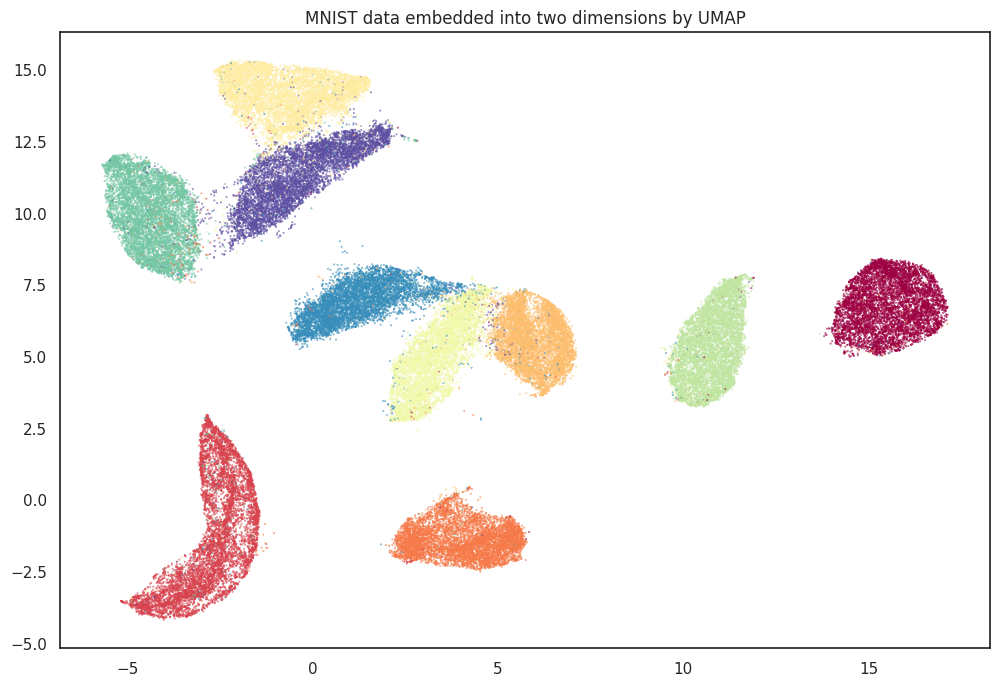

In [ ]:
plt.scatter(u[:,0], u[:,1], c=labels, cmap="Spectral", s=0.1)
plt.title('MNIST data embedded into two dimensions by UMAP')

### T-SNE

In [ ]:
fit_tsne = TSNE(n_components=2, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 43min 41s, sys: 4.57 s, total: 43min 46s
Wall time: 25min 33s


In [ ]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_tsne1.csv')

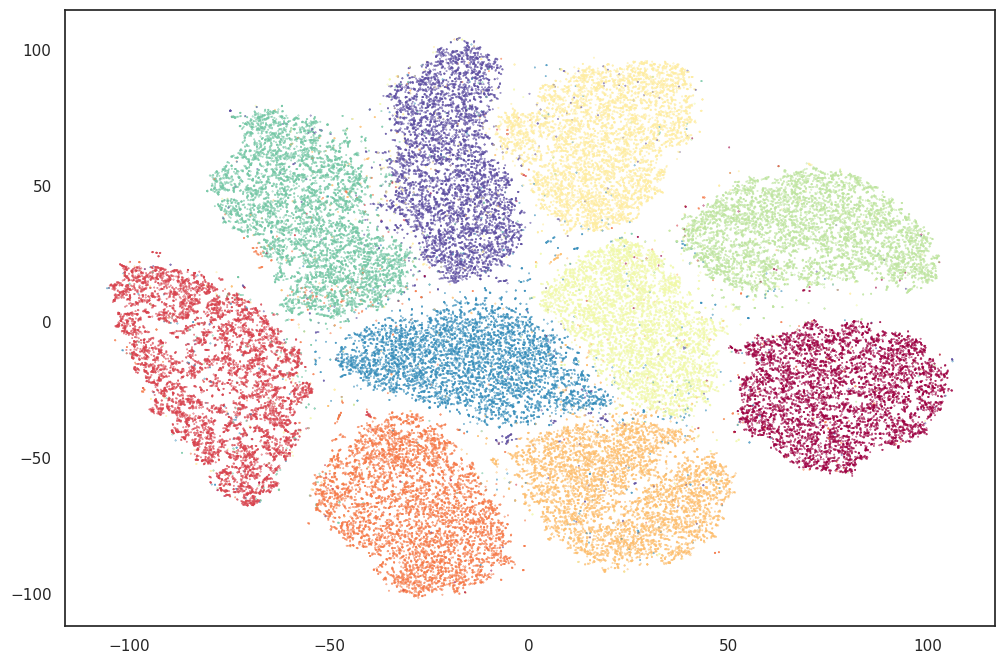

In [ ]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=labels, cmap="Spectral", s=0.1)

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
%time u_pca = pca.fit_transform(data)

CPU times: user 6.01 s, sys: 806 ms, total: 6.82 s
Wall time: 3.96 s


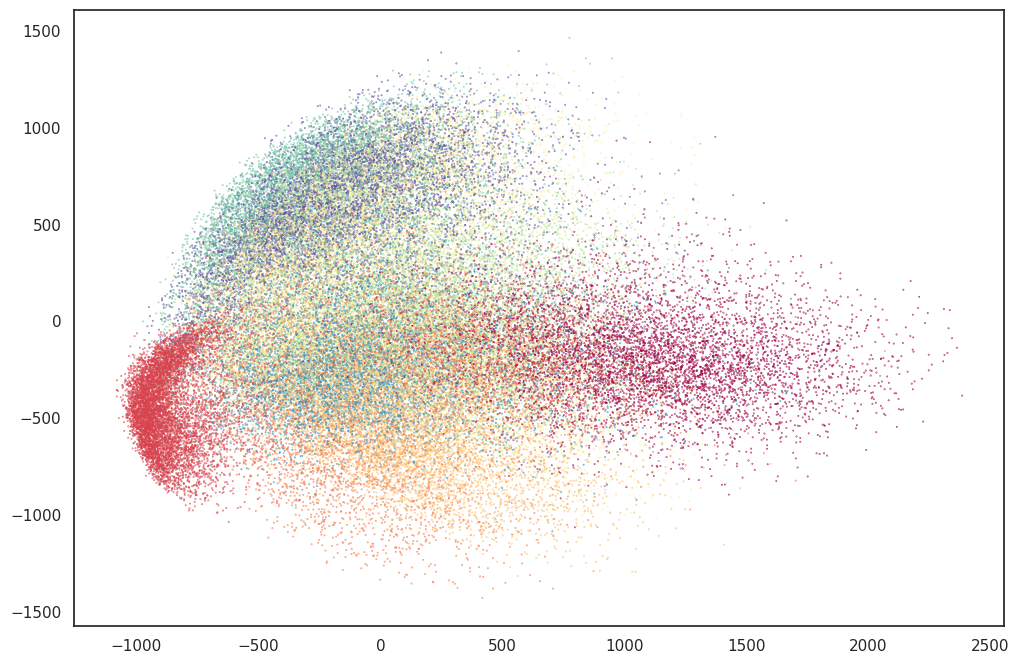

In [ ]:
plt.scatter(u_pca[:,0], u_pca[:,1], c=labels, cmap="Spectral", s=0.1)